In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io, filters, feature
from PIL import Image

#### Reference:
1. [Computer vision (CS 534)](https://www.cs.rutgers.edu/~elgammal/classes/cs534/lectures/)

### __Goal__:
- Capture spectral,textural, and contextual features


## Image processing basics
What is image? <br>

<img src= images/image_data.jpg width=250>

- Convolution: Add each element to local neighbor, weighted by a curve <br>
__Flip the rows, columns of kernel and multiply local similar entries__<br>
Given: 2 matrixes: kernel and image matrix

1. Morphology
2. Erosion - remove boundary pixels: thinner
3. Dilation - Add boundary pixels: thicker
4. Opening/Closing

- Opening: Erose --> dilate (turn small islands of foreground into background)
- Closing: Dilate --> Erose (turn pixels of deviated into neighboring pixels)

5. Distance Transformation

Visualize the polygons
1) Draw the matplotlib.patches object using matplotlib.pyplot --> Cannot get more values 
2) Use shapely.geometry package 

1.0


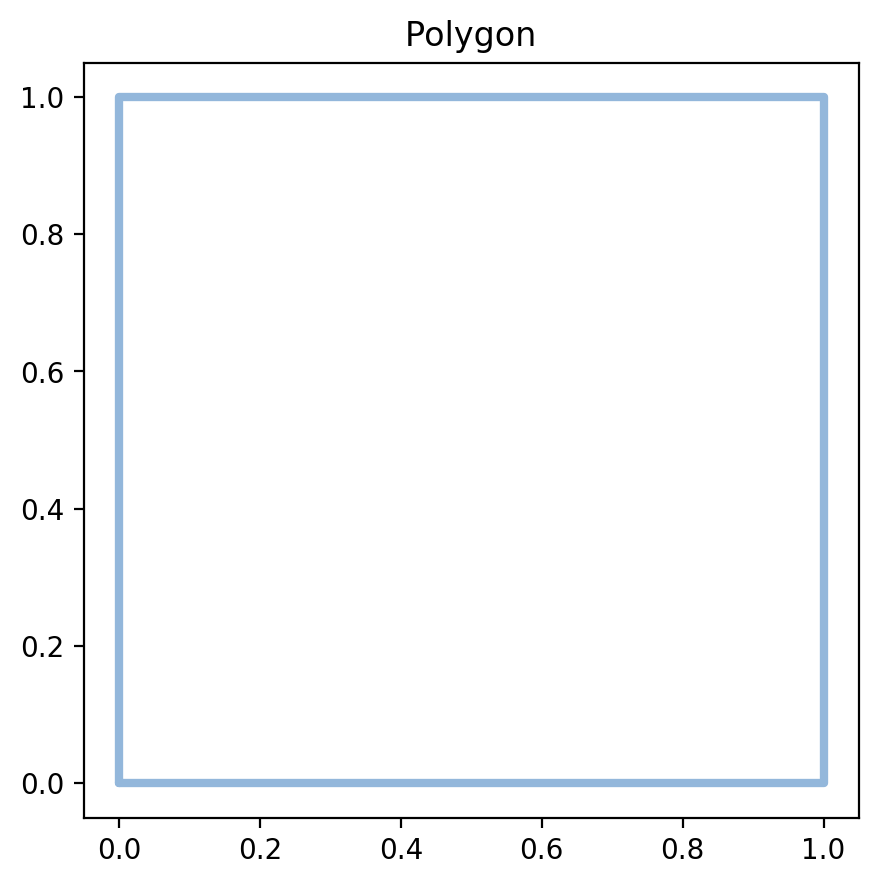

In [6]:
import matplotlib.pyplot as plt
#
#circle = plt.Circle((0, 0), radius=0.75, fc='y')

#plt.gca().add_patch(circle)

#plt.axis('scaled')
#plt.show()
#type(circle)

import shapely.geometry as geom
poly = geom.Polygon([[0,0], [1,0], [1,1], [0,1]]) #geom.Polygon(list of lists)


# Extract the x and y coordinates from type(polygon)
x,y = poly.exterior.xy
fig = plt.figure(1, figsize = (5,5), dpi= 100)
ax = fig.add_subplot(111)
ax.plot(x, y, color='#6699cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
ax.set_title('Polygon')
print(poly.area)

#def areafromgeom(poly):
#    '''
#    Get the area from geom.Polygon shape file
#    Parameters:
#    -------------
#        poly : geom.Polygon shape file 
#    Returns 
#    --------------
#    Area: Real numbers
#    '''
#    x,y = poly.exterior.xy
    


{(0, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f6bb679bb00>,
 (0, 0, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f6bb679bd30>,
 (0, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f6bb679bf60>,
 (0, 1, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f6bb67ac1d0>,
 (0, 2, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f6bb67ac400>,
 (0, 2, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f6bb67ac668>,
 (0, 3, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f6bb67ac8d0>,
 (0, 3, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f6bb67acb38>,
 (0, 4, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f6bb67acda0>,
 (0, 4, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f6bb67b7048>,
 (1, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f6bb67b72b0>,
 (1, 0, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f6bb67b7518>,
 (1, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f6bb67b7780>,

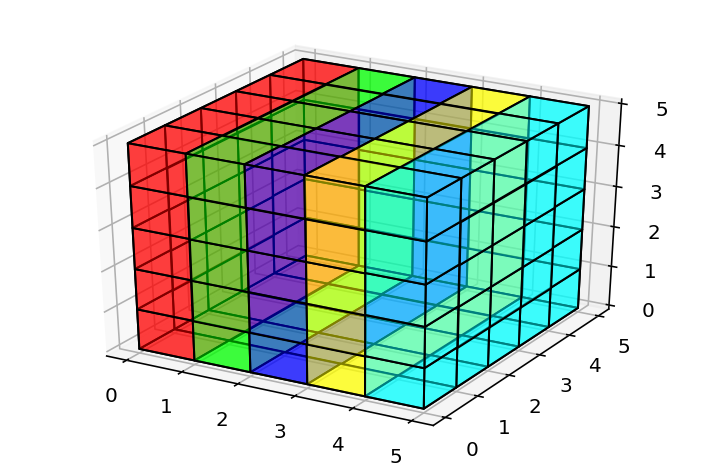

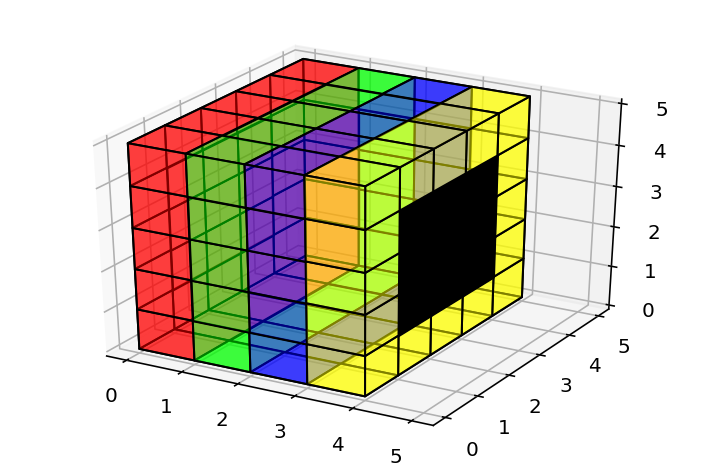

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # NOQA

spatial_axes = [5, 5, 5] # Create axis 
filled = np.ones(spatial_axes, dtype=np.bool) #fill with 

colors = np.empty(spatial_axes + [4], dtype=np.float32)
alpha = .5
colors[0] = [1, 0, 0, alpha]
colors[1] = [0, 1, 0, alpha]
colors[2] = [0, 0, 1, alpha]
colors[3] = [1, 1, 0, alpha]
colors[4] = [0, 1, 1, alpha]

# set all internal colors to black with alpha=1
colors[1:-1, 1:-1, 1:-1, 0:3] = 0
colors[1:-1, 1:-1, 1:-1, 3] = 1

fig = plt.figure()

ax = fig.add_subplot('111', projection='3d')
ax.voxels(filled, facecolors=colors, edgecolors='k')

fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
filled[-1] = False
ax.voxels(filled, facecolors=colors, edgecolors='k')

## Manipulate __mask__ in the image 
This is like filter

## What is __greycomatrix__?
### <font color = red> skimage.feature.greycomatrix(image, distances, angles, levels=None, symmetric=False, normed=False) </font>
1. image: nd.array or array_like [0~]
2. distance: list of pixel pair distance offsets (array_like)
3. angles: list of pixel pair angles in radians (array_like)
4. levels: int, optional [0,levels-1]. use binning othe input image (typically 256 for 8-bit image)
5. symmetric: (bool) Default: false
6. normed : (bool) Default: false

## Co-occurence matrix
- Role: A way to store the count of how often a particular pair $p_{i,j}$ often occur together (i,j: event)
<br> 
- Capture spatial relations  </br>
- Image Analysis: Textures- [Haralick features](http://murphylab.web.cmu.edu/publications/boland/boland_node26.html)



<img src= "glcm.jpg" width = '380' length = '300'>


<br> Here the offset is (3 east,1 south), where there are 3 times where 0,2 are occuring with the given offset.

In [0]:
image = np.array([[1, 1, 5, 6,8], [2, 3, 5, 7, 1], [4, 5, 7, 1,2],  [8, 5, 1, 2, 5]], dtype=np.uint8)
print(image)
plt.imshow(image, interpolation = 'nearest')
plt.show()
image.shape

In [0]:
np.unique(image) # Get the array of unique values in img (numerics)
nrows, ncols = image.shape
row, col = np.ogrid[:nrows, :ncols] # np.ogrid[:3, :5] creates the index according to nrows and ncol. 
cnt_row, cnt_col = nrows / 2, ncols / 2 # Get the center row and column of array
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > cnt_row**2) #Pythagorian distance a^2+b^2= c^2
print(outer_disk_mask)
image[outer_disk_mask] = 0
plt.imshow(image) 
plt.show()

## GLCM Example is provided by __[Matlab GLCM guide](http://matlab.izmiran.ru/help/toolbox/images/enhanc15.html)__
<br>
GLCM creates an array of [min to max] in a given numpy array.
i.e. Indexes correspond to the count instances of neighboring pixel values (say "1 east"). <tab>
    However, I can change the __offset___. <br>
Whereas offset (east 1,0 west) can describe texture with horizontal, GLCM might not be sensitive to vertical. <br>
If the image contains objects of a variety of shapes and sizes, horizontally and vertially; </br>

In [0]:
#How to find the levels:

result = feature.greycomatrix(image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels= 9)
plt.imshow(result[:,:,0,0],interpolation = 'nearest')

In [0]:
import cv2
from PIL import Image
im = Image.open("images/cancer1.tif")
np_im = np.array(im)

## (1) Convert to gray, and threshold
gray = cv2.cvtColor(np_im, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

## (2) Morph-op to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)

## (3) Find the max-area contour
cnts = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
cnt = sorted(cnts, key=cv2.contourArea)[-1]

## (4) Crop and save it
x,y,w,h = cv2.boundingRect(cnt)
dst = np_im[y:y+h, x:x+w]
plt.imshow(dst, interpolation= 'nearest')

In [0]:
print(np.shape(dst))

# Import SciPy's "ndimage" module
import scipy.ndimage as ndi

# Create a histogram, binned at each possible value
hist = ndi.histogram(dst,0, 104, 105)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')

- Other ways to print the shape: np_sizing = [np.size(dst,i) for i in range(3)]

In [0]:
#def glcmSingle (img, numLevels, offset, symmetric, mask): 
    # ---- Input -----
    # 1. img = 3-D array
#    import math
#    import numpy as np
#    glcmSingle = np.zeros(numLevels, numLevels) #Initiate the glcm single array 
#    imgvals = np.sort(img[mask]) #filtered img values are sorted out 
#    imageMax = imgvals[round(0.99*np.size(imgvals))] #get the 99-percentile value of filtered image  
#    imageMin = imgvals[round(0.01*np.size(imgvals))] # get the 1-percentile value of filtered image 
#    binWidth = (imageMax - imageMin)/numLevels # (range of value/ numLevels)
#    ind_img = (img - imageMin)/numLevels 
#    ind_img = math.ceil(ind_img) # Round up the ind_img
#    ind_img[ind_img <= 0] = 1 
#    ind_img[ind_img > numLevels] = numLevels
#    d1N, d2N, d3N = np.shape(img)
#    for d1 = np.arange(d1N):
#        for d2 = np.arange(d2N):
#            for d3 = np.arange(d3N):
#                v1 = ind_img[d1, d2, d3]
#                t1= d1 + offset[0]
#                t2= d2 + offest[1]
#                t3= d3 + offset[2]
#                if (t1>0 and t1 <= d1N and t2<=d2N and t3>0 and t3<=d3N):
#                    v2 = indimg[t1, t2, t3]
#                    elif mask[d1, d2,d3] 

                
                
                
                
#                if (t1>0)&&(t1<=d1N) && (t2>0)&&(t2<=d2N) && (t3>0)&&(t3<=d3N)
#                v2 = indimg(t1, t2, t3);
#                if (mask(d1,d2,d3)&&mask(t1,t2,t3))
#                    glcmSingle(v1,v2) = glcmSingle(v1,v2) + 1;
#                    if (symmetric)
#                        glcmSingle(v2,v1) = glcmSingle(v2,v1) + 1;
#                    end
#                end
#            else
#                continue
#            end
#        end
#    end
#end
#end        
    
#def glcm (img, numLevels, offsets, symmetric, mask): 
#    #Input img: array_like, numlevel = numbers,
#    mask = mask > 0
#     numOffsets = np.size(offsets,axis =0) #offsets.shape[0]
#     glcm = np.zeros((numlevel, numlevel, numoffset), Float)
#     for n in range(1,numoffset):
#             offset = offsets[n,:]
#             glcm_tmp = grayLevelMatrixSingle(img, numLevels, offset, symmetric,mask)
#             glcm[:,:,n] = glcm_tmp
#     glcm = mean(glcm,3)
#     glcm = glcm/sum(glcm[:])
    

    
# function glcmSingle = grayLevelMatrixSingle(img, numLevels, offset, symmetric, mask)
# % compute the gray level matrix for single offset
# glcmSingle = zeros(numLevels, numLevels);
# % produce index images
# imgvals = sort(img(mask));
# imageMax = imgvals(round(0.99*numel(imgvals)));
# imageMin = imgvals(round(0.01*numel(imgvals)));
# %imageMin = imgvals(1);

# binWidth = (imageMax - imageMin)/double(numLevels);

# indimg = (img - imageMin);
# indimg = indimg/binWidth;
# indimg = ceil(indimg);
# indimg(indimg <= 0) = 1;
# indimg(indimg > numLevels) = numLevels;

# d1N = size(img, 1);
# d2N = size(img, 2);
# d3N = size(img, 3);

# for d1 = 1:d1N
#     for d2 = 1:d2N
#         for d3 = 1:d3N
#             % do something
#             v1 = indimg(d1,d2,d3);
#             t1 = d1 + offset(1);
#             t2 = d2 + offset(2);
#             t3 = d3 + offset(3);
#             if (t1>0)&&(t1<=d1N) && (t2>0)&&(t2<=d2N) && (t3>0)&&(t3<=d3N)
#                 v2 = indimg(t1, t2, t3);
#                 if (mask(d1,d2,d3)&&mask(t1,t2,t3))
#                     glcmSingle(v1,v2) = glcmSingle(v1,v2) + 1;
#                     if (symmetric)
#                         glcmSingle(v2,v1) = glcmSingle(v2,v1) + 1;
#                     end
#                 end
#             else
#                 continue
#             end
#         end
#     end
# end
#end    

## Numpy (numerical computing)
1. np.random 


In [0]:
offsets = np.random.randint(2, size = (3, 4, 1))
print(offsets)
np.size(offsets, axis = 2)